# NYU PUI - HOMEWORK 4 - Part 2 Citibikes

Submitted by Zoe Martiniak (zem232)

## Citi Bikes IDEA: 
#### Younger people are more likely to use Citi Bike in the evenings.

## NULL HYPOTHESIS:
#### The proportion of young people (the younger half of the population) is the same or higher than the proportion of the older people (the older half of the population) biking in the evenings (after 7 pm).

# _$H_0$_ : $\frac{Y_{\mathrm{evening}}}{Y_{\mathrm{total}}} - \frac{O_{\mathrm{evening}}}{O_{\mathrm{total}}}>= 0 $
# _$H_1$_ : $\frac{Y_{\mathrm{evening}}}{Y_{\mathrm{total}}} - \frac{O_{\mathrm{evening}}}{O_{\mathrm{total}}} < 0$
#### I will use a significance level  $\alpha=0.05$

In [12]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import matplotlib as mp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiBikeCSV(datestring):
    print("Downloading",datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
        if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
            os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
        ##  Unzip the folder
        os.system("unzip " + datestring + "-citibike-tripdata.zip")
    ## Move to PUIdata
    os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ## Delete zip in directory
    os.system("rm "+ datestring + "-citibike-tripdata.zip")
    ## NOTE: old csv citibike data had a different name structure... and we don't want older data anyway.
    if '2014' in datestring:
        print("Please use a more recent dataset.")
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("UH OH! There seems to be something wrong: the file is not there!")
    else:
        print('File is in place, please continue.')

In [3]:
datestring = '201609'
getCitiBikeCSV(datestring)

File is in place, please continue.


In [4]:
cb_df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
cb_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,975,9/1/2016 00:00:02,9/1/2016 00:16:18,312,Allen St & Stanton St,40.722055,-73.989111,313,Washington Ave & Park Ave,40.696102,-73.967510,22609,Subscriber,1985.0,1
1,1220,9/1/2016 00:00:04,9/1/2016 00:20:25,316,Fulton St & William St,40.709560,-74.006536,239,Willoughby St & Fleet St,40.691966,-73.981302,16966,Subscriber,1977.0,2
2,308,9/1/2016 00:00:19,9/1/2016 00:05:27,479,9 Ave & W 45 St,40.760193,-73.991255,448,W 37 St & 10 Ave,40.756604,-73.997901,25601,Subscriber,1983.0,1
3,250,9/1/2016 00:00:25,9/1/2016 00:04:35,297,E 15 St & 3 Ave,40.734232,-73.986923,487,E 20 St & FDR Drive,40.733143,-73.975739,22094,Subscriber,1953.0,1
4,439,9/1/2016 00:00:25,9/1/2016 00:07:45,494,W 26 St & 8 Ave,40.747348,-73.997236,533,Broadway & W 39 St,40.752996,-73.987216,16319,Subscriber,1985.0,1


In [5]:
cb_df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [6]:
## adding age column
cb_df['age']= 2016-cb_df['birth year']
## cleaning datafile
cb_df.drop(['stoptime', 'start station id', 'start station name', 'start station latitude',
        'start station longitude', 'end station id', 'end station name',
        'end station latitude', 'end station longitude', 'bikeid', 'usertype', 
        'birth year'], axis=1, inplace=True)
## removing the trips longer than 8 hours
cb_df=cb_df[cb_df['tripduration']<=480]
## removing people over the age of 105

In [7]:
## adding date and time column
cb_df['date'] = pd.to_datetime(cb_df['starttime'])



In [8]:
cb_df.drop(['starttime'], axis=1, inplace=True)
## keeping gender and tripduration for further reduction, if necessary
cb_df.head(n=20)

,tripduration,gender,age,date
2,308,1,33.0,2016-09-01 00:00:19
3,250,1,63.0,2016-09-01 00:00:25
4,439,1,31.0,2016-09-01 00:00:25
6,188,2,28.0,2016-09-01 00:00:40
10,186,1,36.0,2016-09-01 00:00:53
16,441,1,53.0,2016-09-01 00:01:04
17,273,1,73.0,2016-09-01 00:01:09
24,69,1,18.0,2016-09-01 00:02:07
26,432,1,59.0,2016-09-01 00:02:44
28,258,2,23.0,2016-09-01 00:03:00


In [10]:
am=mean(cb_df['age'])

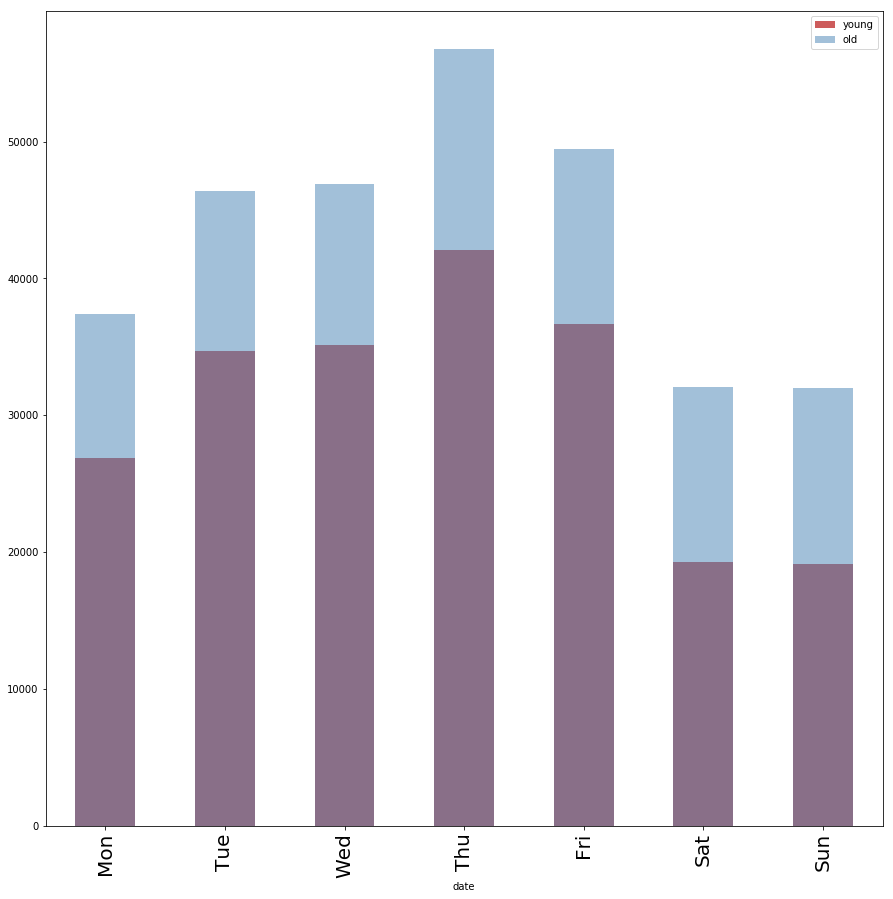

In [15]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_y = 1
((cb_df['date'][cb_df['age']>am].groupby([cb_df['date'].dt.weekday]).count()) / norm_y).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='young')

norm_o = 1
ax = ((cb_df['date'][cb_df['age']<am ].groupby([cb_df['date'].dt.weekday]).count()) / norm_o).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='old')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()